In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
import datetime
import numpy
sbn.set()

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [99]:
fileBases = {"shtmax":"max_temp", "shtmin":"min_temp", "shtpre":"precipitation", "shtsno_b":"snowfall"}
months = ["01","02", "03", "04", "05", "06", "07","08","09","10","11","12"]
series = {}
for file_base in fileBases:
    series[file_base] = pd.Series()
    for month in months:
        frame = pd.read_csv("combined/" + file_base + month + ".txt", sep='\s+', index_col=0, header=None)
        frame = frame.stack()
        frame.index = pd.Index(datetime.date(year_day[0], int(month), year_day[1]) for year_day in frame.index).to_datetime()
        series[file_base] = series[file_base].append(frame)
    series[file_base].sort_index()

final = pd.DataFrame(series)
final = final.rename(columns = fileBases)
final = final[(final.index.month >= 8) | (final.index.year > 1893)].sort_index()
final = final.replace(-99, numpy.nan)
final = final.replace(-9900, numpy.nan)
final = final.reset_index().rename(columns = {"index":"date"})

,date,max_temp,min_temp,precipitation,snowfall
0,1893-08-01,83,53,0,0
1,1893-08-02,85,55,0,0
2,1893-08-03,87,58,0,0
3,1893-08-04,89,64,0,0
4,1893-08-05,86,59,0,0
5,1893-08-06,79,48,0,0
6,1893-08-07,82,56,0,0
7,1893-08-08,93,62,0,0
8,1893-08-09,93,62,0,0
9,1893-08-10,84,56,42,0


 Average High/Low/Precip/Snowfall by Year

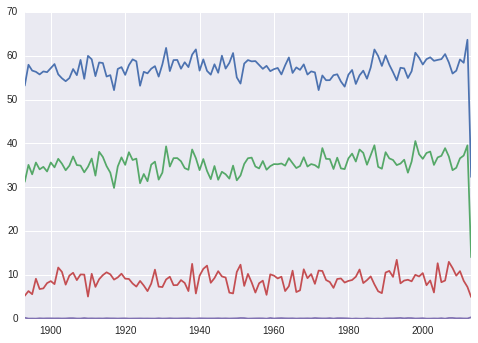

In [86]:
final['max_temp'].groupby(final.date.dt.year).mean().plot(kind='line')
final['min_temp'].groupby(final.date.dt.year).mean().plot(kind='line')
final['precipitation'].groupby(final.date.dt.year).mean().plot(kind='line')
final['snowfall'].groupby(final.date.dt.year).mean().plot(kind='line')

Average Snowfall by Day of Week

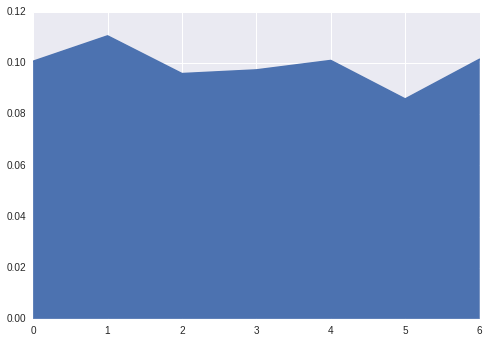

In [4]:
final['snowfall'].groupby(final.date.dt.dayofweek).mean().plot(kind='area')

 Average Snowfall by Month

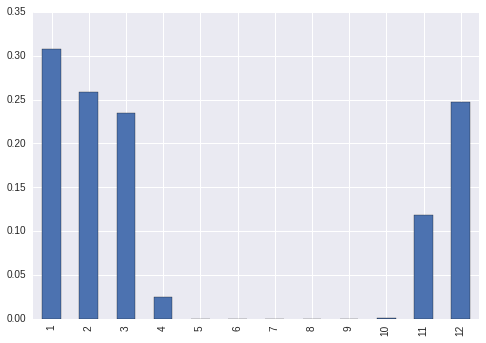

In [88]:
final['snowfall'].groupby(final.date.dt.month).mean().plot(kind='bar')

Hottest Day on Record - July 14, 1936

In [101]:
final.ix[final['max_temp'].idxmax()]

date             1936-07-14 00:00:00
max_temp                         111
min_temp                          71
precipitation                      0
snowfall                           0
Name: 15677, dtype: object

Coldest Day on Record - January 30, 1951

In [103]:
final.ix[final['min_temp'].idxmin()]

date             1951-01-30 00:00:00
max_temp                           2
min_temp                         -43
precipitation                      0
snowfall                           0
Name: 20987, dtype: object

Most Precipitation on Record - May 30, 1941

In [35]:
final.ix[final['precipitation'].idxmax()]

date             1941-05-30 00:00:00
max_temp                          68
min_temp                          58
precipitation                    770
snowfall                           0
avg                               63
dailyChange                       -8
percentSnow                        0
Name: 17457, dtype: object

Most Rain on Record - May 30, 1914

In [100]:
final['rain'] = final['precipitation'] - final['snowfall']

In [23]:
final.ix[final['rain'].idxmax()]

date               1941-05-30 00:00:00
max_temp                            68
min_temp                            58
precipitation                      770
snowfall                             0
dailyChangehigh                    -14
dailyChangeLow                      -3
rain                               770
Name: 17457, dtype: object

Biggest Temperature Change on Record - February 16, 1948

In [107]:
final['delta'] = final['max_temp'] - final['min_temp']
final.ix[final['delta'].idxmax()]

date             1948-02-16 00:00:00
max_temp                          46
min_temp                         -32
precipitation                      0
snowfall                           0
delta                             78
Name: 19909, dtype: object

In [28]:
final['avg'] = (final['max_temp'] + final['min_temp']) // 2
final['dailyChange'] = final['avg'] - final['avg'].shift().fillna(0)
final.head()

,date,max_temp,min_temp,precipitation,snowfall,year,month,day,avg,dailyChange
0,1893-08-01,83,53,0,0,1893,8,1,68,68
1,1893-08-02,85,55,0,0,1893,8,2,70,2
2,1893-08-03,87,58,0,0,1893,8,3,72,2
3,1893-08-04,89,64,0,0,1893,8,4,76,4
4,1893-08-05,86,59,0,0,1893,8,5,72,-4


Average Temperature Change vs Precipitaiton

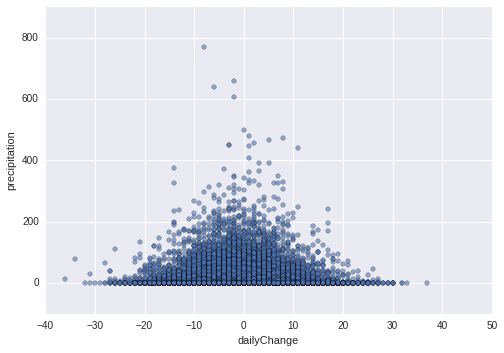

In [11]:
final.plot(kind='scatter', x='dailyChange', y='precipitation', alpha = 0.6)

Change in High Temp vs Precipitation

In [8]:
final['dailyChangehigh'] = final['max_temp'] - final['max_temp'].shift()

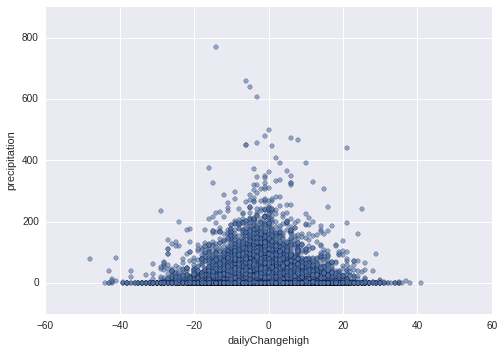

In [10]:
final.plot(kind='scatter', x='dailyChangehigh', y='precipitation', alpha = 0.6)

Change in Low Temp vs Precipitation

In [11]:
final['dailyChangeLow'] = final['min_temp'] - final['min_temp'].shift()

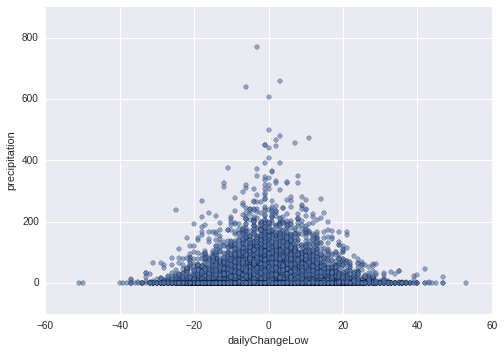

In [12]:
final.plot(kind='scatter', x='dailyChangeLow', y='precipitation', alpha = 0.6)

Proportion of Precipitation Due to Snowfall by Year

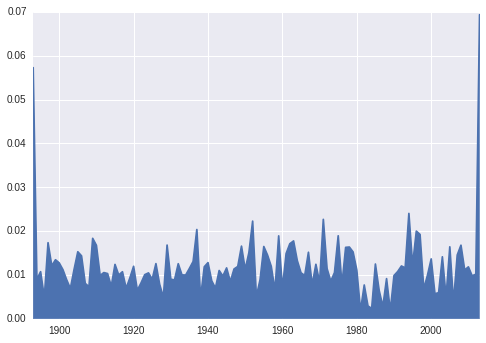

In [34]:
snow = final['snowfall'].groupby(final.date.dt.year).sum()
precip = final['precipitation'].groupby(final.date.dt.year).sum()
(snow / precip).plot(kind='area')

White Christmases

In [101]:
final['month'] = final.date.dt.month
final['day'] = final.date.dt.day

snow = False

final['snow'] = True

for index, row in final.iterrows():
    if row['snowfall'] > 0:
        snow = True
    if row['max_temp'] > 35:
        snow = False
        
    final.set_value(index, 'snow', snow)
    
final.head()

,date,max_temp,min_temp,precipitation,snowfall,rain,month,day,snow
0,1893-08-01,83,53,0,0,0,8,1,False
1,1893-08-02,85,55,0,0,0,8,2,False
2,1893-08-03,87,58,0,0,0,8,3,False
3,1893-08-04,89,64,0,0,0,8,4,False
4,1893-08-05,86,59,0,0,0,8,5,False


In [46]:
final[(final.month == 12) & (final.day == 25) & (final.snow)]

,date,max_temp,min_temp,precipitation,snowfall,year,month,day,avg,dailyChange,snow
146,1893-12-25,33,22,3,1,1893,12,25,27,-16,True
876,1895-12-25,33,10,0,0,1895,12,25,21,-4,True
1606,1897-12-25,28,15,0,0,1897,12,25,21,18,True
2701,1900-12-25,12,5,0,0,1900,12,25,8,-6,True
3431,1902-12-25,3,-11,0,0,1902,12,25,-4,-18,True
3796,1903-12-25,17,-9,14,2,1903,12,25,4,-18,True
4891,1906-12-25,27,17,0,0,1906,12,25,22,10,True
5986,1909-12-25,22,9,13,2,1909,12,25,15,-1,True
6351,1910-12-25,29,8,35,3,1910,12,25,18,17,True
7811,1914-12-25,2,-6,0,0,1914,12,25,-2,-4,True


Unusual Precipitation

In [52]:
final[(final.snowfall > 0) & (final.month > 3) & (final.month < 11)]

,date,max_temp,min_temp,precipitation,snowfall,month,day,snow,rain
21048,1951-04-01,36,28,10,1,4,1,False,9
21422,1952-04-10,35,20,45,1,4,10,True,44
21425,1952-04-13,36,30,50,5,4,13,False,45
21426,1952-04-14,48,33,51,3,4,14,False,48
22901,1956-04-29,38,29,92,2,4,29,False,90
24350,1960-04-18,56,25,22,1,4,18,False,21
24714,1961-04-17,42,25,13,2,4,17,False,11
25063,1962-04-01,38,27,33,2,4,1,False,31
25064,1962-04-02,40,12,10,1,4,2,False,9
25071,1962-04-09,42,26,8,1,4,9,False,7


In [55]:
final[(final.rain > 0) & ((final.month < 2) | (final.month > 11))]

,date,max_temp,min_temp,precipitation,snowfall,month,day,snow,rain
123,1893-12-02,12,-1,2,1,12,2,True,1
127,1893-12-06,16,9,2,1,12,6,True,1
130,1893-12-09,36,3,2,1,12,9,False,1
131,1893-12-10,14,5,28,3,12,10,True,25
135,1893-12-14,33,30,47,4,12,14,True,43
136,1893-12-15,33,12,21,3,12,15,True,18
144,1893-12-23,50,34,8,2,12,23,False,6
145,1893-12-24,53,33,53,4,12,24,False,49
146,1893-12-25,33,22,3,1,12,25,True,2
148,1893-12-27,37,29,6,2,12,27,False,4


Drought

In [102]:
final['dryDays'] = 0
days = 0

for index, row in final.iterrows():
    if row['rain'] > 0:
        days = 0
    else:
        days += 1
    
    final.set_value(index, 'dryDays', days)
    
final.head()

,date,max_temp,min_temp,precipitation,snowfall,rain,month,day,snow,dryDays
0,1893-08-01,83,53,0,0,0,8,1,False,1
1,1893-08-02,85,55,0,0,0,8,2,False,2
2,1893-08-03,87,58,0,0,0,8,3,False,3
3,1893-08-04,89,64,0,0,0,8,4,False,4
4,1893-08-05,86,59,0,0,0,8,5,False,5


In [106]:
final['lastDryDay'] = final['dryDays'] > final['dryDays'].shift(-1)
final.tail()

,date,max_temp,min_temp,precipitation,snowfall,rain,month,day,snow,dryDays,lastDryDay
43673,2013-03-27,41,18,0,0,0,3,27,False,9,False
43674,2013-03-28,45,19,0,0,0,3,28,False,10,False
43675,2013-03-29,52,23,0,0,0,3,29,False,11,True
43676,2013-03-30,53,31,2,0,2,3,30,False,0,False
43677,2013-03-31,49,27,2,0,2,3,31,False,0,False


In [108]:
final[(final.dryDays > 30) & (final.lastDryDay)]

,date,max_temp,min_temp,precipitation,snowfall,rain,month,day,snow,dryDays,lastDryDay
64,1893-10-04,63,44,0,0,0,10,4,False,43,True
317,1894-06-14,93,61,0,0,0,6,14,False,45,True
827,1895-11-06,55,33,0,0,0,11,6,False,45,True
950,1896-03-09,40,25,0,0,0,3,9,False,44,True
1538,1897-10-18,63,38,0,0,0,10,18,False,32,True
1928,1898-11-12,46,22,0,0,0,11,12,False,45,True
5292,1908-01-30,23,2,0,0,0,1,30,False,32,True
5811,1909-07-03,82,61,0,0,0,7,3,False,33,True
6085,1910-04-03,72,41,0,0,0,4,3,False,31,True
6184,1910-07-11,93,48,0,0,0,7,11,False,37,True


Storms

In [109]:
final['rainDays'] = 0
days = 0

for index, row in final.iterrows():
    if row['rain'] > 0:
        days += 1
    else:
        days = 0
    
    final.set_value(index, 'rainDays', days)
    
final.head()

,date,max_temp,min_temp,precipitation,snowfall,rain,month,day,snow,dryDays,lastDryDay,rainDays
0,1893-08-01,83,53,0,0,0,8,1,False,1,False,0
1,1893-08-02,85,55,0,0,0,8,2,False,2,False,0
2,1893-08-03,87,58,0,0,0,8,3,False,3,False,0
3,1893-08-04,89,64,0,0,0,8,4,False,4,False,0
4,1893-08-05,86,59,0,0,0,8,5,False,5,False,0


In [114]:
final[final.rainDays > 7]

,date,max_temp,min_temp,precipitation,snowfall,rain,month,day,snow,dryDays,lastDryDay,rainDays
3678,1903-08-29,61,56,8,0,8,8,29,False,0,False,8
5562,1908-10-27,49,40,10,0,10,10,27,False,0,False,8
5748,1909-05-01,34,26,7,0,7,5,1,False,0,False,8
11283,1924-06-30,68,40,11,0,11,6,30,False,0,False,8
11284,1924-07-01,71,41,2,0,2,7,1,False,0,False,9
13923,1931-09-23,80,58,5,0,5,9,23,False,0,False,8
16343,1938-05-11,62,40,2,0,2,5,11,False,0,False,8
17461,1941-06-03,72,55,2,0,2,6,3,False,0,False,8
21904,1953-08-05,74,58,2,0,2,8,5,False,0,False,8
21905,1953-08-06,78,61,2,0,2,8,6,False,0,False,9


Saturdays with least rain

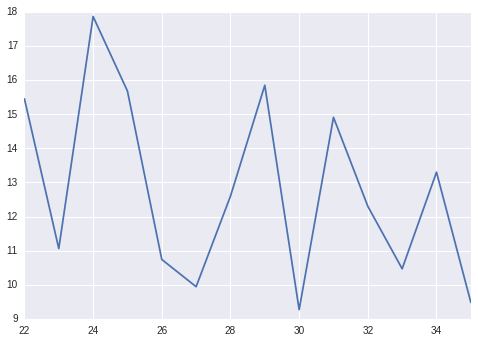

In [120]:
s = final[(final.date.dt.dayofweek == 5) & (final.month >= 6) & (final.month < 9)]

s['rain'].groupby(s.date.dt.week).mean().plot()